# Project: Investigate a Dataset - [tmdb-movies.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Introduction**: In this notebook is the analysis of tmdb-movies.csv, a dataset containing 10866 movies from The Movie Database (TMDb).This dataset contains many columns that will be useful in our analysis such as "vote_average" and "revenue_adj".<br> The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.<br> Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters, we will deal with it later. <br>It consists of the following columns:<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           1- id<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           2- imdb_id<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           3- popularity<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           4- budget<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           5- revenue<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           6- original_title<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           7- cast<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           8- homepage<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           9- director<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           10- tagline<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           11- keywords<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           12- overview<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           13- runtime<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           14- genres<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           15- production_companies<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           16- release_date<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           17- vote_count<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           18- vote_average<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           19- release_year<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           20- budget_adj <br>
&emsp;&emsp;&emsp;&emsp;&emsp;           21- revenue_adj<br>



### Question(s) for Analysis
>Questions we will explore: <br>
&emsp;&emsp;&emsp;&emsp;&emsp;           1- What are the top 10 revenue_adj movies & their characteristics<br>
&emsp;&emsp;&emsp;&emsp;&emsp;           2- What are the genres of movies & their characteristics<br>

### Downloading and importing required packages

In [1]:
#Here I upgraded pandas and installed a package i found called IMDbPY
!pip install --upgrade pandas==0.25.0
!pip install IMDbPY

    100% |████████████████████████████████| 10.5MB 1.8MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3
    100% |████████████████████████████████| 307kB 16.8MB/s ta 0:00:01


In [2]:
#Importing packages to use
import pandas as pd
import numpy as np
import imdb
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Loading my dataset and taking a quick overview of it

In [3]:
#Loaded my csv file
df = pd.read_csv("tmdb-movies.csv")

In [4]:
#Made a head of the dataset to get a quick view of it
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
#Shows me info about the dataset to know what I'm working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#Shows my the shape to know the number of rows and columns I'm working on
df.shape

(10866, 21)


## Data Cleaning
 

### Checking for Data to clean

In [7]:
#Tells me how many duplicated items there are in my dataset
df.duplicated().sum() 

1

In [8]:
#Shows me the specific row that is duplicated
df[df.duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [9]:
#Shows number of null values in each column
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Cleaning Process

In [10]:
#Removing the columns that won't be beneficial in my analysis
df.drop(["homepage", "overview", "production_companies", "keywords", "tagline", "runtime"], axis = 1, inplace = True)

In [11]:
#Removes duplicates
df.drop_duplicates(inplace = True)

In [12]:
#Checks again for duplicates
df.duplicated().sum() 

0

In [13]:
#Takes about 30 seconds
#Using IMDbpy library, I got the imdb_id from the movie's title
for missing_value_index in df[df["imdb_id"].isnull()].index:
    movie = imdb.IMDb().search_movie(df.loc[missing_value_index, "original_title"])[0]
    imdb.IMDb().update(movie)
    if movie.get("year") == df.loc[missing_value_index, "release_year"]:  
        df.loc[missing_value_index, "imdb_id"] = "tt" + str(movie.movieID)
    else:
        df.drop(index = missing_value_index, axis = 0, inplace = True)

In [14]:
#Checking for any null values in imdb_id column as the following part depends on it
df["imdb_id"].isnull().sum()

0

In [15]:
#Function that transforms the columns like genre and cast which contain many values 
#seperated by | into a list with these values
def strToList(column):
    df[column] = df[column].apply(lambda value: str(value).split("|"))

In [16]:
#Function that transforms floats of a column to int, also transfroms numbers in scientific notation 
# into regular integers
def floatToInt(column_df):
    df[column_df] = df[column_df].apply(int)

In [17]:
#This function takes 2 arguments (column name in our dataframe, column name in the imdb keys), it 
# searches for the movie by its imdb id then takes the value of the column_imdb and inserts into
# the column_df but if the value is missing the row is dropped
#then it uses strToList which was defined previously if column isn't "director"
def clean_nan(column_df, column_imdb):
    for missing_value_index in df[df[column_df].isnull()].index:
        movie = imdb.IMDb().get_movie(df.loc[missing_value_index, "imdb_id"][2:])
        if movie.get("year") == df.loc[missing_value_index, "release_year"] and movie.get(column_imdb):
            try:
                if column_df == "genres":
                    df.at[missing_value_index, column_df] = "|".join(movie.get(column_imdb))
                elif column_df == "cast":
                    df.loc[missing_value_index, column_df] = "|".join([person['name'] for person in movie['cast']])
                else:
                    df.loc[missing_value_index, column_df] = str(movie.get(column_imdb)[0])
            except TypeError:
                df.drop(missing_value_index ,inplace = True, axis = 0)
        else:
            df.drop(missing_value_index ,inplace = True, axis = 0)
    if column_df != "director":
        strToList(column_df)

In [18]:
#Takes about 1.5 minutes
#function called on director column
clean_nan("director", "director")

In [19]:
#Takes about 50 seconds
#function called on genres column
clean_nan("genres", "genres")

In [20]:
#Takes about 2.5 minutes
#function called on cast column
clean_nan("cast", "cast")

In [21]:
#reseting the indexing to prevent any problems later on
df.reset_index(drop = True, inplace = True)

In [22]:
#making sure all nulls are either fixed or dropped
df.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [23]:
#function that fills zeros in a column with the column's mean
def clean_zeros(column_df):
    for missing_value_index in df[df[column_df] == 0].index:
        df.loc[missing_value_index, column_df] = df[column_df].mean()
    floatToInt(column_df)

In [24]:
#function called on budget column
clean_zeros("budget")

In [25]:
#function called on revenue column
clean_zeros("revenue")

In [26]:
#function called on budget_adj column
clean_zeros("budget_adj")

In [27]:
#function called on revenue_adj column
clean_zeros("revenue_adj")

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the top 50 revenue_adj movies & their characteristics ?)

In [28]:
#Assigns top 50 revenue_adj movies to a variable called top_revenue
#reseting the index to prevent any future problems
top_revenue = df.sort_values("revenue_adj", ascending = False).head(50)
top_revenue.reset_index(drop = True, inplace = True)

In [29]:
#Assigns a list of numbers which will be used as ticks of y-axis to a variable called y_ticks
y_ticks = np.arange(0, 4000000000, 500000000)

Text(0.5,0,'Popularity')

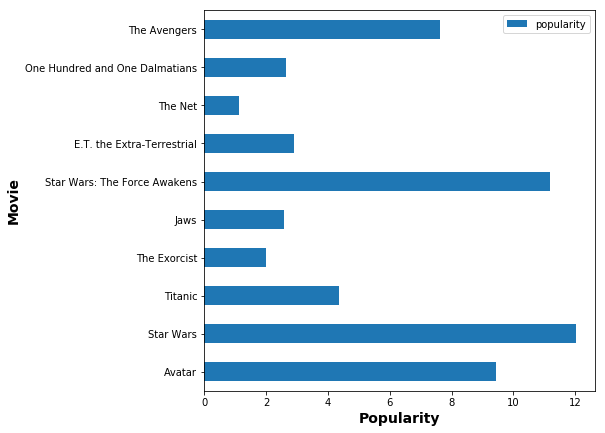

In [30]:
#Plots the top_revenue movie as horizontal bar chart in relation to their popularity
top_revenue.head(10).plot(kind = "barh", x = "original_title", y = "popularity", figsize = (7, 7));
plt.ylabel("Movie", fontdict={"fontsize": 14, "fontweight": "bold"})
plt.xlabel("Popularity", fontdict={"fontsize": 14, "fontweight": "bold"})

In [31]:
#Function to restore scientific notation numbers to integers for yticks
def format(value, position):
    return f"{int(value)}"

Text(0,0.5,'Money')

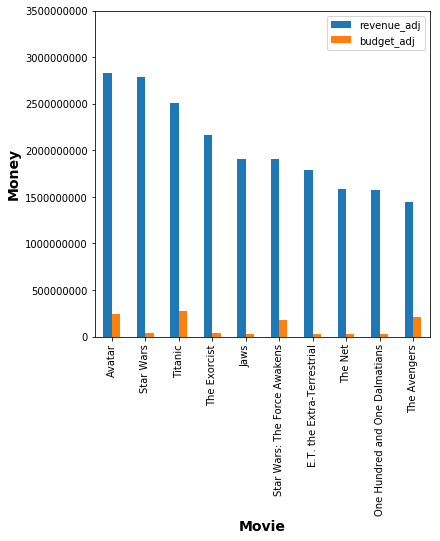

In [32]:
#plots top_revenue movies as bar chart comparing their budgets_adj and revenue_adj 
plot = top_revenue.head(10).plot(kind = "bar", figsize=(6, 6), x = "original_title", y = ["revenue_adj", "budget_adj"]);
plot.set_yticks(np.linspace(0, 100, 100))
plot.yaxis.set_major_formatter(ticker.FuncFormatter(format))
plot.set_ylim(y_ticks[0] , y_ticks[-1])
plt.yticks(y_ticks)
plt.xlabel("Movie", fontdict={"fontsize": 14, "fontweight": "bold"})
plt.ylabel("Money", fontdict={"fontsize": 14, "fontweight": "bold"})

In [33]:
#Function that returns values that occur more than the filter value in the top_revenue movies
def most_repeated(column, filters, dataset):
    item_counts = {}
    filtered_item_counts = {}
    for index in dataset.index:
        for item in dataset.loc[index, column]:
            if item in item_counts:
                item_counts[item] = item_counts[item] + 1
            else:
                item_counts[item] = 1

    for item in item_counts:
        if item_counts[item] > filters:
            filtered_item_counts.update({item: item_counts[item]})
    return filtered_item_counts

In [34]:
#function called on cast column and stored in repeated_actors
repeated_actors = most_repeated("cast", 4, top_revenue)
#function called on genres column and stored in repeated_genres
repeated_genres = most_repeated("genres", 20, top_revenue)

In [35]:
#prints found data
print("Using the highest 50 movies in revenue:")
print(f"Actors: {list(repeated_actors.keys())} frequently appear in the highest revenue movies")
print(f"Genres: {list(repeated_genres.keys())} frequently appear in the highest revenue movies")

Using the highest 50 movies in revenue:
Actors: ['Orlando Bloom', 'Daniel Radcliffe', 'Rupert Grint', 'Emma Watson'] frequently appear in the highest revenue movies
Genres: ['Action', 'Adventure'] frequently appear in the highest revenue movies


### Research Question 2  (Genres of movies & their characteristics)

In [36]:
#Makes a copy of our df called duplicates_ok
duplicates_ok = df.copy()

In [37]:
#Takes about 5 minutes
#Splits genres of movies as single genres by duplicating movie multiple times but
# with a single genre from the list and drops the original rows
for i in duplicates_ok.index:
    if len(duplicates_ok.loc[i, "genres"]) > 1:
        for genre in duplicates_ok.loc[i, "genres"]:
            new_row_data = {}
            for column in duplicates_ok.columns:
                if column == "genres":
                    new_row_data.update({column: genre})
                else:
                    new_row_data.update({column: duplicates_ok.loc[i, column]})

            duplicates_ok = duplicates_ok.append(new_row_data, ignore_index = True)
    else:
        duplicates_ok.loc[i, "genres"] = duplicates_ok.loc[i, "genres"][0]
        duplicates_ok = duplicates_ok.append(duplicates_ok.iloc[i], ignore_index = True)

duplicates_ok.drop(duplicates_ok[: len(df)].index, inplace = True)
duplicates_ok.reset_index(drop = True, inplace = True)

In [38]:
#Drops any movies wit genres that still contain square brackets 
#to prevent any problems in the following 
for i in duplicates_ok.index:
    if "[" in duplicates_ok["genres"][i]:
        duplicates_ok.drop(i, inplace = True)
duplicates_ok.reset_index(drop = True, inplace = True)

In [39]:
#groups by genre and mean of every column
duplicates_ok_genres_mean = duplicates_ok.groupby("genres").mean()

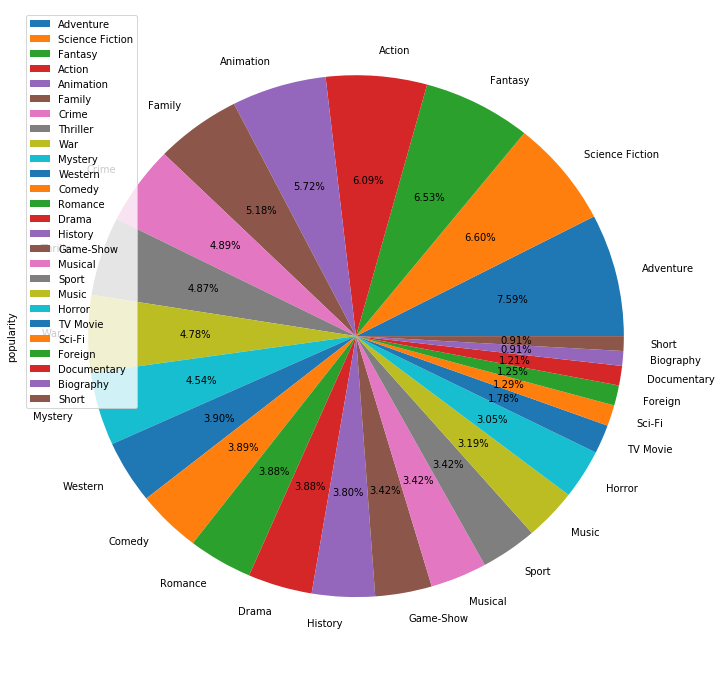

In [40]:
#Plots a pie chart of genres with average popularity and their percentage
duplicates_ok_genres_mean.sort_values("popularity", ascending = False).plot(kind = "pie", y = "popularity", figsize = (12, 12), autopct = "%1.2f%%")

In [41]:
#Assigns a list of numbers which will be used as ticks of y-axis to a variable called y_ticks2
y_ticks2 = np.arange(0, 250000000, 50000000)

Text(0,0.5,'Money')

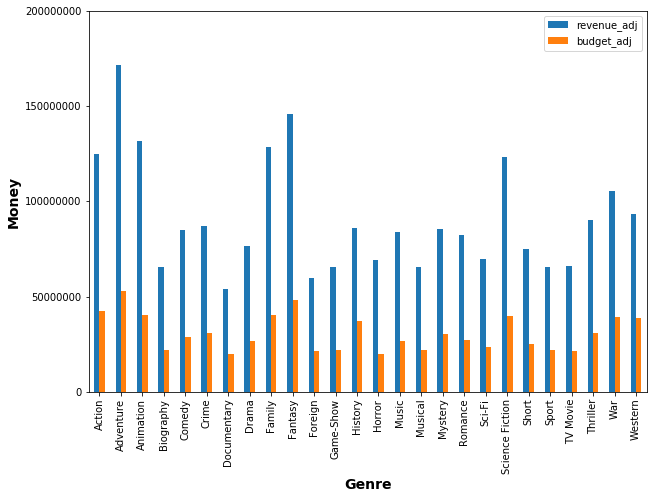

In [42]:
#plots a bar chart of average revenue_adj and budget_adj of each genre
plot2 = duplicates_ok_genres_mean.plot(kind = "bar", figsize=(10, 7), y = ["revenue_adj", "budget_adj"]);
plot2.set_yticks(np.linspace(0, 100, 100))
plot2.set_ylim(y_ticks2[0], y_ticks2[-1])
plot2.yaxis.set_major_formatter(ticker.FuncFormatter(format))
plt.yticks(y_ticks2)
plt.xlabel("Genre", fontdict={"fontsize": 14, "fontweight": "bold"})
plt.ylabel("Money", fontdict={"fontsize": 14, "fontweight": "bold"})

<a id='conclusions'></a>
## My Conclusions 
> **Limitations:** A problem in our dataset is that almost half the revenue, revenue_adj, budget and budget_adj columns have 0 as values. I tried getting them from imdbpy package but it took too long and not all values were available; therefore the stats aren't 100% accurate. There were also many nans but i solved them using the imdbpy package as shown in the previous code.<br>
Also the speed of the imdbpy package is a little slow which isn't much of a problem in this dataset but will have a huge impact on larger ones

> **Done:  Research Question 1 (Top 50 revenue_adj movies & their characteristics):**<br>
From our first question, using the highest 50 movies in revenue, we find that actors Orlando Bloom, Daniel Radcliffe, Rupert Grint, Emma Watson and genres Action, Adventure frequently appear in the highest revenue movies
So if you want to make a movie and profit a lot, benefit from the analysis I have done!!<br>


> **Done:  Research Question 2 (Genres of movies & their characteristics):**<br>
From our second question, using the genres of our movies, we find that Adventure genre has the highest average in popularity, budget_adj and revenue_adj, while Documentry genre has the lowest in all of them. 

> **Used resources:** <br>
&emsp;&emsp;&emsp;&emsp;&emsp; 1- IMdbpy: https://github.com/RyanMarcus/imdbpy <br>
&emsp;&emsp;&emsp;&emsp;&emsp; 2- Internet searches for some functions

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0